In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [2]:
df = pd.read_csv('Datasets/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


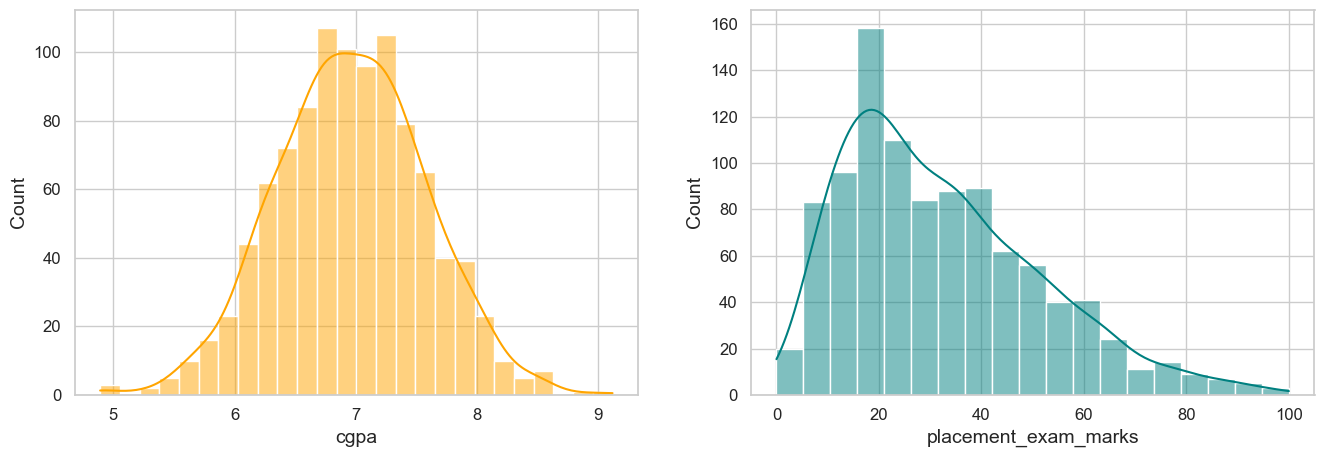

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

sns.histplot(df['cgpa'], kde=True, ax=ax1, color='orange')
sns.histplot(df['placement_exam_marks'], kde=True, ax=ax2, color='teal')

plt.show()

In [7]:
df['placement_exam_marks'].skew()

0.8356419499466834

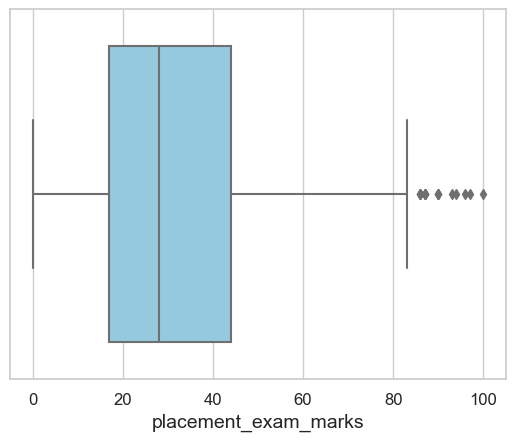

In [10]:
sns.boxplot(x=df['placement_exam_marks'], color='skyblue', saturation=0.75)
plt.show()

In [12]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

## Finding the IQR

In [11]:
percentile_25 = df['placement_exam_marks'].quantile(0.25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)

In [13]:
print(percentile_25)
print(percentile_75)

17.0
44.0


In [14]:
IQR = percentile_75 - percentile_25

In [15]:
IQR

27.0

In [16]:
upper_limit = percentile_75 + 1.5*IQR
lower_limit = percentile_25 - 1.5*IQR

In [17]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


## Finding Outliers

In [18]:
df.loc[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [20]:
df.loc[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [22]:
new_df = df.loc[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


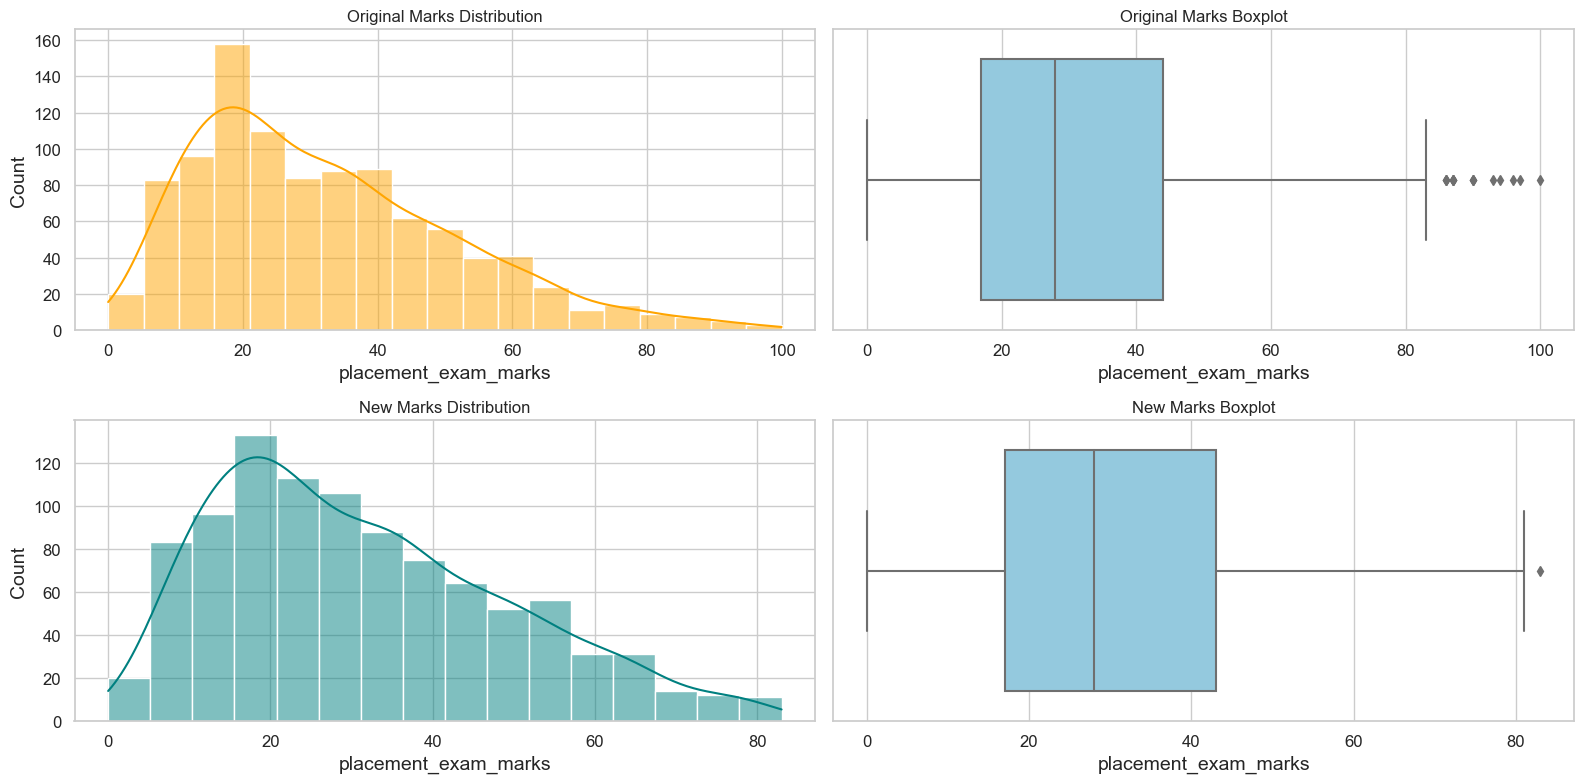

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.histplot(df['placement_exam_marks'], kde=True, ax=ax[0, 0], color='orange')
ax[0, 0].set_title('Original Marks Distribution', fontsize=12)

sns.boxplot(x=df['placement_exam_marks'], color='skyblue', saturation=0.75, ax=ax[0, 1])
ax[0, 1].set_title('Original Marks Boxplot', fontsize=12)

sns.histplot(new_df['placement_exam_marks'], kde=True, ax=ax[1, 0], color='teal')
ax[1, 0].set_title('New Marks Distribution', fontsize=12)

sns.boxplot(x=new_df['placement_exam_marks'], color='skyblue', saturation=0.75, ax=ax[1, 1])
ax[1, 1].set_title('New Marks Boxplot', fontsize=12)

plt.tight_layout()

plt.show()

## Capping

In [26]:
new_df_copy = df.copy()

In [27]:
new_df_copy['placement_exam_marks'] = np.where(
                                            new_df_copy['placement_exam_marks'] > upper_limit,
                                            upper_limit,
                                            np.where(
                                            new_df_copy['placement_exam_marks'] < lower_limit,
                                                lower_limit,
                                                new_df_copy['placement_exam_marks']
                                            )
                                            
                                                )

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


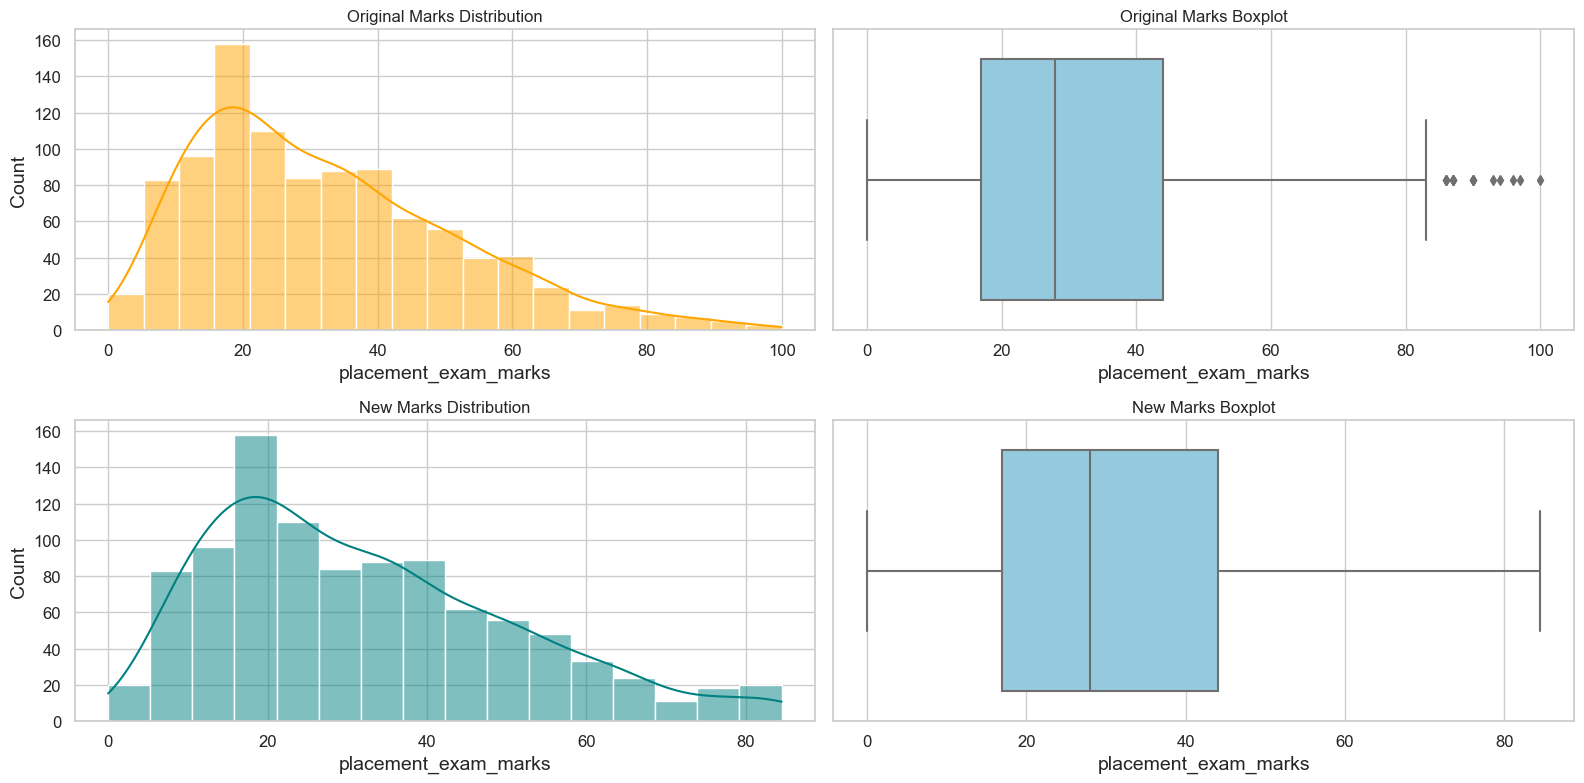

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

sns.histplot(df['placement_exam_marks'], kde=True, ax=ax[0, 0], color='orange')
ax[0, 0].set_title('Original Marks Distribution', fontsize=12)

sns.boxplot(x=df['placement_exam_marks'], color='skyblue', saturation=0.75, ax=ax[0, 1])
ax[0, 1].set_title('Original Marks Boxplot', fontsize=12)

sns.histplot(new_df_copy['placement_exam_marks'], kde=True, ax=ax[1, 0], color='teal')
ax[1, 0].set_title('New Marks Distribution', fontsize=12)

sns.boxplot(x=new_df_copy['placement_exam_marks'], color='skyblue', saturation=0.75, ax=ax[1, 1])
ax[1, 1].set_title('New Marks Boxplot', fontsize=12)

plt.tight_layout()

plt.show()